# GANCA Results Visualization


## Snapshot to Voxel

Code used for turning snapshots in the generation into voxel plots

In [1]:
# import stuff

import visualise_helper
import utils
%load_ext autoreload
from tqdm.notebook import tqdm
%autoreload 2

import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib
import gc

from loguru import logger as gurulogger
gurulogger.remove()
gurulogger.add(sys.stdout, colorize=True, format="<blue>{time}</blue> <level>{message}</level>")
gurulogger.level("INFO", color="<red><bold>")

BLOCK2VEC_OUT_PATH = 'output/block2vec saves/block2vec 64 dim locked air/'
NUM_WORKERS = int(os.cpu_count() / 2)

# disable plt showing plots in notebook
plt.ioff()
%matplotlib agg
%matplotlib agg
matplotlib.use('agg')

In [2]:
embedding, mcid2block, block2embeddingidx, embeddingidx2block, block2mcid = utils.get_embedding_info(BLOCK2VEC_OUT_PATH)
converter = utils.DataConverter(embedding, mcid2block, block2embeddingidx, embeddingidx2block, block2mcid)

In [7]:
def visualize_snapshots_in_path(
    min_epoch = 0,
    max_epoch = 16, 
    snapshots_folder_path = 'lightning_logs/GANCA/version_15/gen_snapshots', 
    n_cols = 4,
    explode_world=False,
    trim_world=False,
    no_air = True,
    alpha = True,
    world = True,
    explode_alpha = True,
    trim_alpha = True,
    metric='euclidean',
):

    if world:
        # Logged progress per epoch to image
        for i in tqdm(range(min_epoch, max_epoch), desc = 'world states loop'):
            loaded = np.load(snapshots_folder_path + f'/epoch_{i}.npy')
            fig = visualise_helper.states_to_graphs(
                    loaded, 
                    embedding.weight.cpu(), 
                    n_cols=n_cols, 
                    n_rows= int(loaded.shape[0] / n_cols), 
                    converter_class=converter, 
                    size_multiplier=4,
                    explode=explode_world,
                    trim=trim_world,
                    no_air = no_air,
                    metric = metric,
                )
            fig.suptitle(f'visualizing epoch {i}')
            fig.savefig(snapshots_folder_path + f'/epoch_{i}_{metric}.png')
            plt.clf()
            plt.close()
            plt.close('all')
            plt.close(fig)
            del fig
            gc.collect()

    if alpha:
        # Visualising alpha channel
        for i in tqdm(range(min_epoch, max_epoch), desc = 'alpha states loop'):
            loaded = np.load(snapshots_folder_path + f'/epoch_{i}_alpha.npy')
            fig = visualise_helper.alpha_states_to_graphs(
                    loaded, 
                    n_cols=n_cols, 
                    n_rows= int(loaded.shape[0] / n_cols), 
                    size_multiplier=4,
                    explode = explode_alpha, # this makes covered voxels visible
                    trim = trim_alpha, # remove uselsss white info
                )
            fig.suptitle(f'visualizing epoch {i}')
            fig.savefig(snapshots_folder_path + f'/epoch_{i}_alpha.png')
            plt.clf()
            plt.close()
            plt.close('all')
            plt.close(fig)
            del fig
            gc.collect()

Possible paths:

- GANCA_MMGAN
- GANCA_WGAN
- GANCA_WGANGP
- GANCA_WGANGP_DUAL_D
- Deconv_WGANGP

In [35]:
# GANCA_MMGAN (all done)

# visualize_snapshots_in_path(
#     min_epoch = 0,
#     max_epoch = 16, 
#     snapshots_folder_path = 'lightning_logs/GANCA_MMGAN/version_0/gen_snapshots', 
#     n_cols = 4,
#     explode_world=False,
#     trim_world=False,
#     no_air = True,
#     alpha = False,
#     world = True,
#     explode_alpha = False,
#     trim_alpha = False,
#     metric='euclidean',
# )

world states loop:   0%|          | 0/16 [00:00<?, ?it/s]

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

In [40]:
# GANCA_WGAN (all done)

# visualize_snapshots_in_path(
#     min_epoch = 0,
#     max_epoch = 16, 
#     snapshots_folder_path = 'lightning_logs/GANCA_WGAN/version_0/gen_snapshots', 
#     n_cols = 4,
#     explode_world=False,
#     trim_world=False,
#     no_air = True,
#     alpha = False,
#     world = True,
#     explode_alpha = False,
#     trim_alpha = False,
#     metric='euclidean',
# )

world states loop:   0%|          | 0/16 [00:00<?, ?it/s]

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

In [37]:
# GANCA_WGANGP (all done)

# visualize_snapshots_in_path(
#     min_epoch = 0,
#     max_epoch = 16, 
#     snapshots_folder_path = 'lightning_logs/GANCA_WGANGP/version_0/gen_snapshots', 
#     n_cols = 4,
#     explode_world=False,
#     trim_world=False,
#     no_air = True,
#     alpha = False,
#     world = True,
#     explode_alpha = False,
#     trim_alpha = False,
#     metric='euclidean',
# )

world states loop:   0%|          | 0/16 [00:00<?, ?it/s]

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

In [39]:
# GANCA_WGANGP_DUAL_D　(all done)

# visualize_snapshots_in_path(
#     min_epoch = 0,
#     max_epoch = 16, 
#     snapshots_folder_path = 'lightning_logs/GANCA_WGANGP_DUAL_D/version_0/gen_snapshots', 
#     n_cols = 4,
#     explode_world=False,
#     trim_world=False,
#     no_air = True,
#     alpha = False,
#     world = True,
#     explode_alpha = False,
#     trim_alpha = False,
#     metric='euclidean',
# )

world states loop:   0%|          | 0/16 [00:00<?, ?it/s]

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

In [8]:
# Deconv_WGANGP (all done)

visualize_snapshots_in_path(
    min_epoch = 0,
    max_epoch = 16, 
    snapshots_folder_path = 'lightning_logs/Deconv_WGANGP/version_0/gen_snapshots', 
    n_cols = 4,
    explode_world=False,
    trim_world=False,
    no_air = False,
    alpha = False,
    world = True,
    explode_alpha = False,
    trim_alpha = False,
    metric='euclidean',
)

world states loop:   0%|          | 0/16 [00:00<?, ?it/s]

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

colordict init success


3D plots:   0%|                                                                                               …

## Metrics Visualise

In [9]:
# !wget https://github.com/chaosarium/deep-learning-experiments/raw/master/pytorchlightning/tflogs2pandas.py

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from tflogs2pandas import tflog2pandas
import os
sns.set_theme()
import matplotlib as mpl

plt.ion()
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

In [53]:
# load from tensorboard log

versions = [
    'lightning_logs/GANCA_MMGAN/version_0',
    'lightning_logs/GANCA_WGAN/version_0',
    'lightning_logs/GANCA_WGANGP/version_0',
    'lightning_logs/GANCA_WGANGP_DUAL_D/version_0',
    'lightning_logs/Deconv_WGANGP/version_0',
]

In [82]:
log_dfs = []
for version in versions:
    print(f"loading {version}")
    log_df = tflog2pandas(version)
    log_df = log_df.pivot(columns='metric', values='value')
    print(log_df.keys(), '\n')
    log_dfs.append(log_df)

rolling_log_dfs = []
rolling_window = 100

for log_df in log_dfs:
    smoothed_log_df = log_df.rolling(rolling_window, min_periods=1).mean()
    rolling_log_dfs.append(smoothed_log_df)

loading lightning_logs/GANCA_MMGAN/version_0
Index(['avg_acc', 'd_loss', 'epoch', 'fake_acc', 'fake_loss', 'g_loss',
       'real_acc', 'real_loss'],
      dtype='object', name='metric') 

loading lightning_logs/GANCA_WGAN/version_0
Index(['d_loss', 'epoch', 'fake_loss', 'g_loss', 'real_loss'], dtype='object', name='metric') 

loading lightning_logs/GANCA_WGANGP/version_0
Index(['d_loss', 'epoch', 'fake_validity', 'g_loss', 'real_validity'], dtype='object', name='metric') 

loading lightning_logs/GANCA_WGANGP_DUAL_D/version_0
Index(['d_a_loss', 'd_loss', 'epoch', 'fake_alpha_validity', 'fake_validity',
       'g_loss', 'real_alpha_validity', 'real_validity'],
      dtype='object', name='metric') 

loading lightning_logs/Deconv_WGANGP/version_0
Index(['d_loss', 'epoch', 'fake_validity', 'g_loss', 'real_validity'], dtype='object', name='metric') 



### Epoch

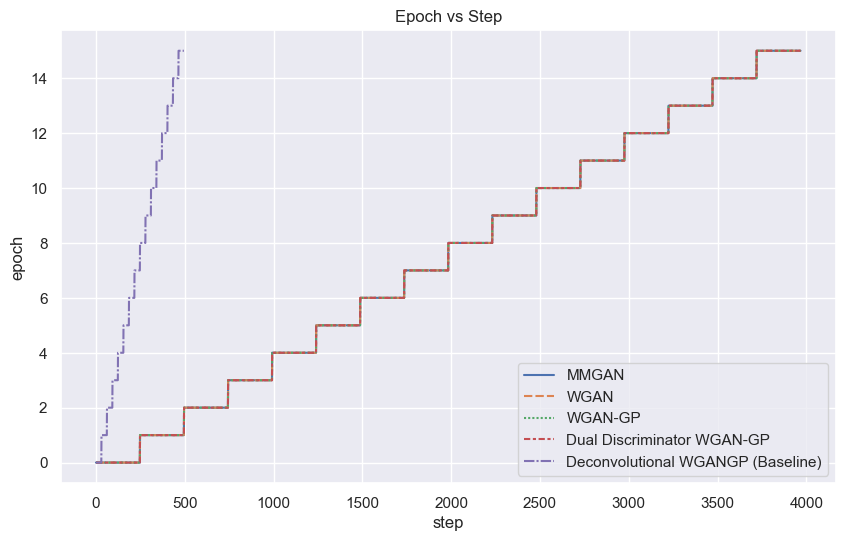

In [90]:
epochs_df = pd.DataFrame(data={
    'MMGAN': log_dfs[0]['epoch'],
    'WGAN': log_dfs[1]['epoch'],
    'WGAN-GP': log_dfs[2]['epoch'],
    'Dual Discriminator WGAN-GP': log_dfs[3]['epoch'],
    'Deconvolutional WGANGP (Baseline)': log_dfs[4]['epoch'],
})

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=epochs_df)
ax.set_title('Epoch vs Step')
ax.set_xlabel('step')
ax.set_ylabel('epoch')
plt.show()

### G Loss

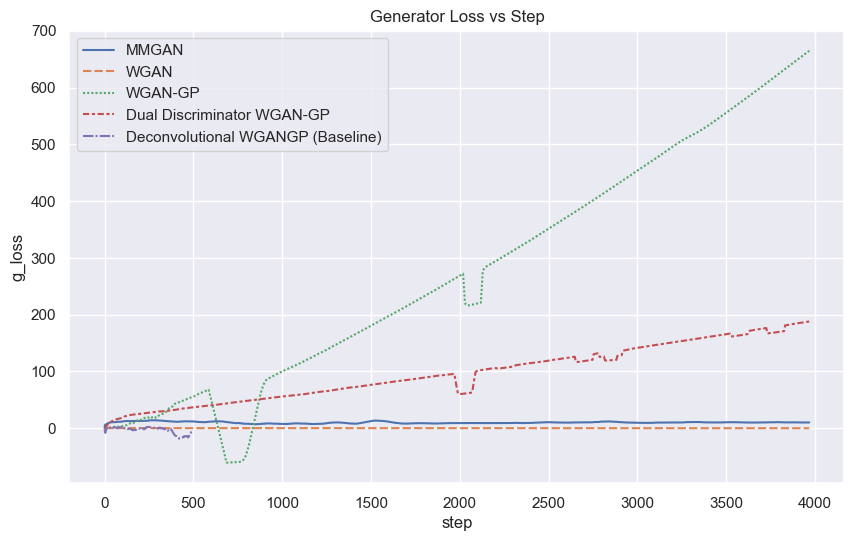

In [89]:
g_loss_df = pd.DataFrame(data={
    'MMGAN': rolling_log_dfs[0]['g_loss'],
    'WGAN': rolling_log_dfs[1]['g_loss'],
    'WGAN-GP': rolling_log_dfs[2]['g_loss'],
    'Dual Discriminator WGAN-GP': rolling_log_dfs[3]['g_loss'],
    'Deconvolutional WGANGP (Baseline)': rolling_log_dfs[4]['g_loss'],
})

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=g_loss_df)
ax.set_title('Generator Loss vs Step')
ax.set_xlabel('step')
ax.set_ylabel('g_loss')
plt.show()

### D Loss

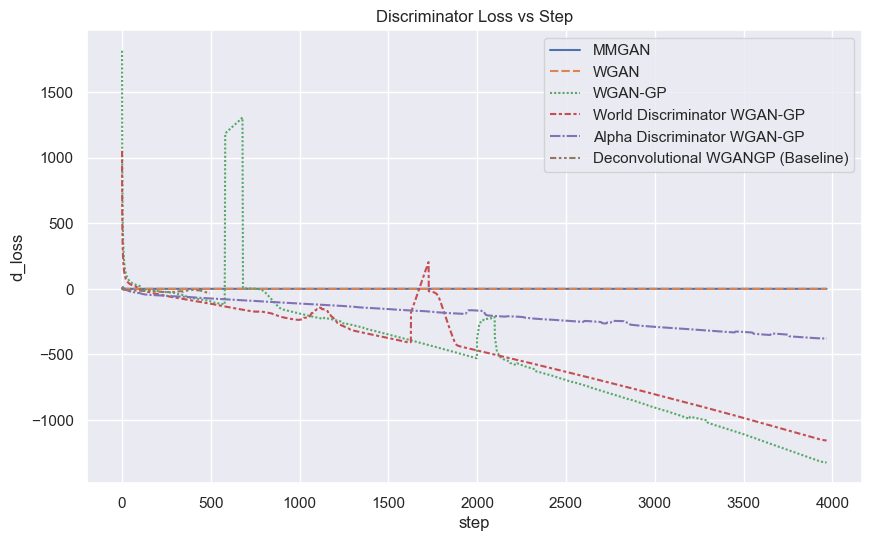

In [91]:
d_loss_df = pd.DataFrame(data={
    'MMGAN': rolling_log_dfs[0]['d_loss'],
    'WGAN': rolling_log_dfs[1]['d_loss'],
    'WGAN-GP': rolling_log_dfs[2]['d_loss'],
    'World Discriminator WGAN-GP': rolling_log_dfs[3]['d_loss'],
    'Alpha Discriminator WGAN-GP': rolling_log_dfs[3]['d_a_loss'],
    'Deconvolutional WGANGP (Baseline)': rolling_log_dfs[4]['d_loss'],
})

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=d_loss_df)
ax.set_title('Discriminator Loss vs Step')
ax.set_xlabel('step')
ax.set_ylabel('d_loss')
plt.show()

### Validity

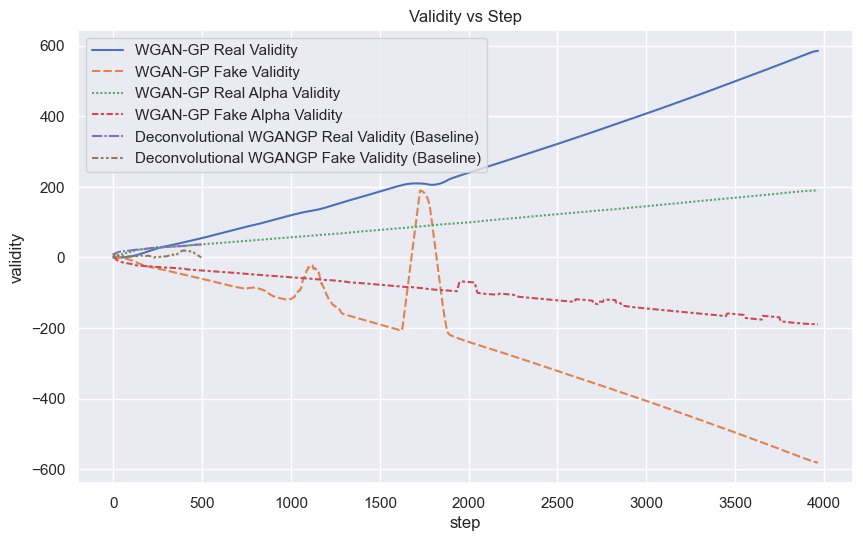

In [96]:
validity_df = pd.DataFrame(data={
    'WGAN-GP Real Validity': rolling_log_dfs[2]['real_validity'],
    'WGAN-GP Fake Validity': rolling_log_dfs[2]['fake_validity'],
    'WGAN-GP Real Validity': rolling_log_dfs[3]['real_validity'],
    'WGAN-GP Fake Validity': rolling_log_dfs[3]['fake_validity'],
    'WGAN-GP Real Alpha Validity': rolling_log_dfs[3]['real_alpha_validity'],
    'WGAN-GP Fake Alpha Validity': rolling_log_dfs[3]['fake_alpha_validity'],
    'Deconvolutional WGANGP Real Validity (Baseline)': rolling_log_dfs[4]['real_validity'],
    'Deconvolutional WGANGP Fake Validity (Baseline)': rolling_log_dfs[4]['fake_validity'],
})

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=validity_df)
ax.set_title('Validity vs Step')
ax.set_xlabel('step')
ax.set_ylabel('validity')
plt.show()

### ACC

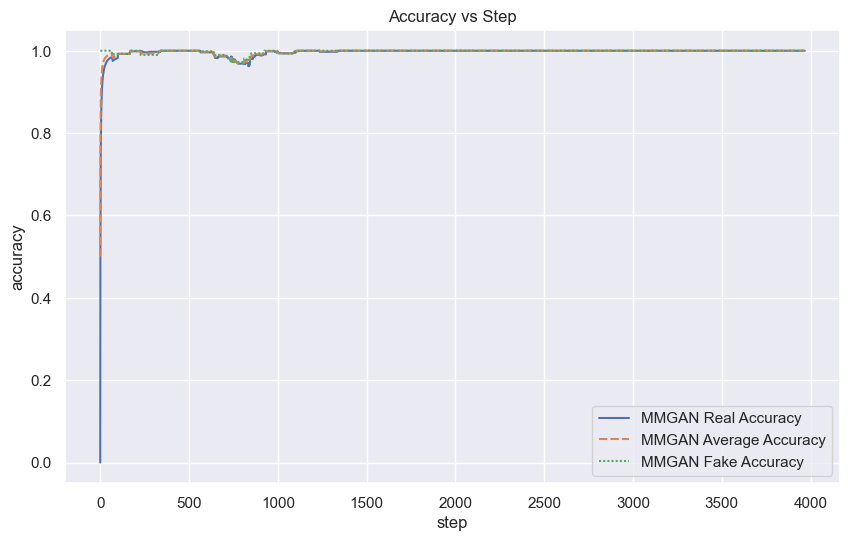

In [95]:
accuracy_df = pd.DataFrame(data={
    'MMGAN Real Accuracy': rolling_log_dfs[0]['real_acc'],
    'MMGAN Average Accuracy': rolling_log_dfs[0]['avg_acc'],
    'MMGAN Fake Accuracy': rolling_log_dfs[0]['fake_acc'],
})

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=accuracy_df)
ax.set_title('Accuracy vs Step')
ax.set_xlabel('step')
ax.set_ylabel('accuracy')
plt.show()